## Data Input & Preprocessing

In [12]:
import warnings
import sys
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt

In [13]:
# Import data and transform data to time series
data = pd.read_csv(r"./data/regime_model.csv",index_col='timestamp',parse_dates=True) 
data.head()

,close,high,low,open,volume,log_returns,volatility_10,vol_adj_returns,EMA_50,EMA_200,RSI_14,MACD,MACD_Signal,ATR_14,SAR,SLOPE_14,ADX_14,OBV
timestamp,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00+00:00,7210.24,7225.00,7171.10,7171.43,3865.038,0.005380,0.0,0.0,7210.240000,7210.240000,0.0,0.000000,0.000000,0.0,7171.100000,0.0,0.0,0.000
2020-01-01 02:00:00+00:00,7237.99,7239.30,7206.46,7210.38,3228.365,0.003841,0.0,0.0,7211.328235,7210.516119,0.0,2.213675,0.442735,0.0,7172.178000,0.0,0.0,3228.365
2020-01-01 03:00:00+00:00,7221.65,7239.74,7215.00,7237.41,2513.307,-0.002260,0.0,0.0,7211.733010,7210.626904,0.0,2.619333,0.878055,0.0,7174.862880,0.0,0.0,715.058
2020-01-01 04:00:00+00:00,7213.86,7225.41,7211.22,7221.80,1176.666,-0.001079,0.0,0.0,7211.816422,7210.659074,0.0,2.285882,1.159620,0.0,7178.755507,0.0,0.0,-461.608
2020-01-01 05:00:00+00:00,7220.31,7224.09,7213.86,7213.86,928.221,0.000894,0.0,0.0,7212.149503,7210.755104,0.0,2.513111,1.430318,0.0,7182.414577,0.0,0.0,466.613


In [14]:
# Check if you have a missing value 
data.isnull ().any()

close              False
high               False
low                False
open               False
volume             False
log_returns        False
volatility_10      False
vol_adj_returns    False
EMA_50             False
EMA_200            False
RSI_14             False
MACD               False
MACD_Signal        False
ATR_14             False
SAR                False
SLOPE_14           False
ADX_14             False
OBV                False
dtype: bool

In [15]:
#Dropping any missing values from data 
data.dropna(inplace=True)

In [16]:
data.columns

Index(['close', 'high', 'low', 'open', 'volume', 'log_returns',
       'volatility_10', 'vol_adj_returns', 'EMA_50', 'EMA_200', 'RSI_14',
       'MACD', 'MACD_Signal', 'ATR_14', 'SAR', 'SLOPE_14', 'ADX_14', 'OBV'],
      dtype='object')

In [17]:
# show the dataframe
print('Shape of data',data.shape)

Shape of data (26303, 18)


In [18]:
data

,close,high,low,open,volume,log_returns,volatility_10,vol_adj_returns,EMA_50,EMA_200,RSI_14,MACD,MACD_Signal,ATR_14,SAR,SLOPE_14,ADX_14,OBV
timestamp,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00+00:00,7210.24,7225.00,7171.10,7171.43,3865.038,0.005380,0.000000,0.000000,7210.240000,7210.240000,0.000000,0.000000,0.000000,0.000000,7171.100000,0.000000,0.000000,0.000
2020-01-01 02:00:00+00:00,7237.99,7239.30,7206.46,7210.38,3228.365,0.003841,0.000000,0.000000,7211.328235,7210.516119,0.000000,2.213675,0.442735,0.000000,7172.178000,0.000000,0.000000,3228.365
2020-01-01 03:00:00+00:00,7221.65,7239.74,7215.00,7237.41,2513.307,-0.002260,0.000000,0.000000,7211.733010,7210.626904,0.000000,2.619333,0.878055,0.000000,7174.862880,0.000000,0.000000,715.058
2020-01-01 04:00:00+00:00,7213.86,7225.41,7211.22,7221.80,1176.666,-0.001079,0.000000,0.000000,7211.816422,7210.659074,0.000000,2.285882,1.159620,0.000000,7178.755507,0.000000,0.000000,-461.608
2020-01-01 05:00:00+00:00,7220.31,7224.09,7213.86,7213.86,928.221,0.000894,0.000000,0.000000,7212.149503,7210.755104,0.000000,2.513111,1.430318,0.000000,7182.414577,0.000000,0.000000,466.613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,16564.30,16585.00,16562.00,16571.80,3780.956,-0.000447,0.000847,-0.527354,16570.226305,16677.616070,58.938724,6.664455,6.356370,29.414286,16535.189308,2.021429,39.187976,-4935594.170
2022-12-31 20:00:00+00:00,16563.50,16569.70,16562.00,16564.30,2395.389,-0.000048,0.000756,-0.063854,16569.962529,16676.480587,57.077626,5.466609,6.178418,28.578571,16540.445736,1.550000,38.543446,-4937989.559
2022-12-31 21:00:00+00:00,16544.00,16566.40,16538.60,16563.50,4092.844,-0.001178,0.000840,-1.401622,16568.944390,16675.162372,43.209055,2.910273,5.524789,28.850000,16666.600000,-1.457143,36.020576,-4942082.403


In [19]:
# Show summary statistics of data
print(data.describe())

              close          high           low          open         volume  \
count  26303.000000  26303.000000  26303.000000  26303.000000   26303.000000   
mean   28874.953486  29037.182531  28704.004092  28874.596617   16160.527584   
std    17112.365077  17215.241584  17005.046965  17112.715489   16285.889706   
min     4062.890000   4598.000000   3621.810000   4062.950000      63.932000   
25%    11625.070000  11661.125000  11582.855000  11624.655000    6743.329000   
50%    23680.100000  23808.700000  23523.000000  23680.100000   11225.281000   
75%    42987.430000  43209.050000  42744.050000  42987.865000   19580.698000   
max    68714.850000  69198.700000  68525.960000  68714.850000  312462.168000   

        log_returns  volatility_10  vol_adj_returns        EMA_50  \
count  26303.000000   26303.000000     26303.000000  26303.000000   
mean       0.000032       0.006438         0.007607  28866.239331   
std        0.008100       0.004985         1.011112  17096.327262   
min

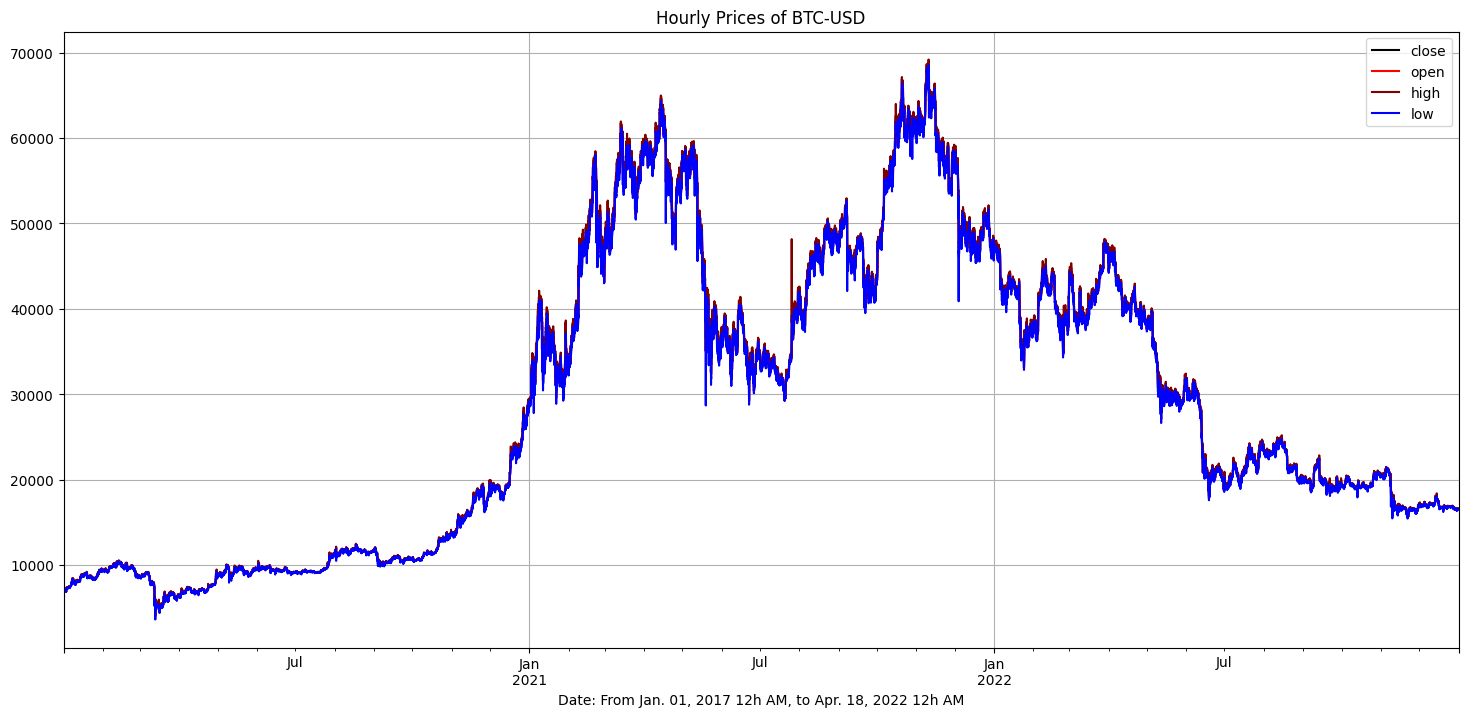

In [20]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
data['close'].plot(color='black',grid = True)
data['open'].plot(color='red',grid = True)
data['high'].plot(color='maroon',grid = True)
data['low'].plot(color='blue',grid = True)
plt.title('Hourly Prices of BTC-USD')
plt.xlabel('Date: From Jan. 01, 2017 12h AM, to Apr. 18, 2022 12h AM')
plt.legend()
plt.show()

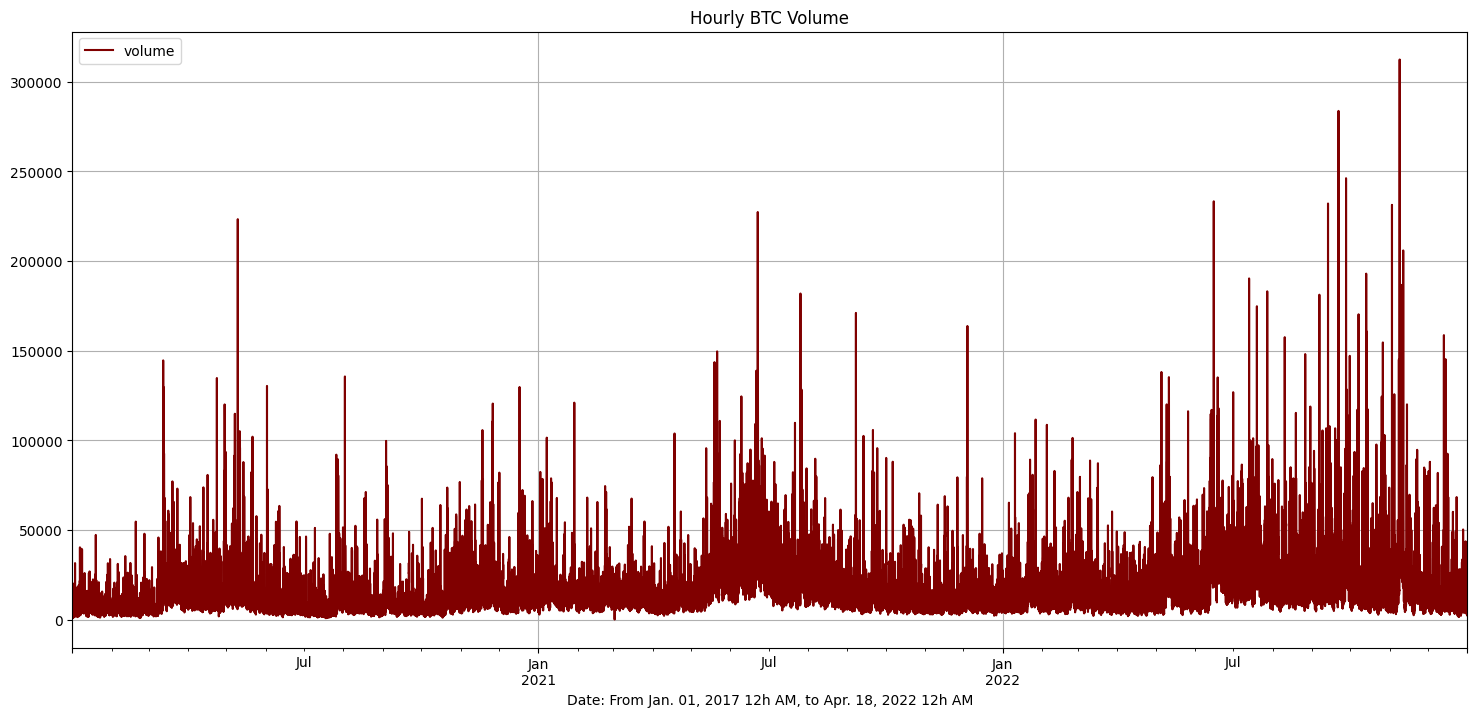

In [21]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
data['volume'].plot(color='maroon',grid = True)
plt.title('Hourly BTC Volume')
plt.xlabel('Date: From Jan. 01, 2017 12h AM, to Apr. 18, 2022 12h AM')
plt.legend()
plt.show()

## Information Criterion

In [22]:
#TRAIN and TEST SPLIT of Closing prices
#Splitting the dataset into 97% training set and 3% Test set
print(data.shape)
#divide into train and validation set
train = data[:int(0.97*(len(data)))] #97%
valid = data[int(0.97*(len(data))):] #3%
print(train.shape,valid.shape)

(26303, 18)
(25513, 18) (790, 18)


In [23]:
dataset = data[['close','open','high','low']]
dataset = dataset.to_numpy()

In [24]:
dataset

array([[ 7210.24,  7171.43,  7225.  ,  7171.1 ],
       [ 7237.99,  7210.38,  7239.3 ,  7206.46],
       [ 7221.65,  7237.41,  7239.74,  7215.  ],
       ...,
       [16544.  , 16563.5 , 16566.4 , 16538.6 ],
       [16515.1 , 16544.  , 16565.1 , 16461.8 ],
       [16537.6 , 16515.1 , 16546.9 , 16483.1 ]], shape=(26303, 4))

In [25]:
PLOT_SHOW=True
PLOT_TYPE = False

#Observations for testing kept aside

NUM_TEST = valid.shape[0]
print(NUM_TEST)

#Latency time 

K=50 # For increment of the prediction window, the more you decrease the number the more you obtain a good precision  
NUM_ITERS=10000 # for the criterion to stop the calculation in the HMM model to find the optimal parameters 

labels = ['close','open','high','low']
likelihood_vect = np.empty([0,1]) # Initialization of the likelihood list vector

bic_vect = np.empty([0,1]) # Initialization of the BIC list vector

# Possible number of states in Markov Model
STATE_SPACE = range(2,7)

#Evaluation metric 
# Calculating Mean Absolute Percentage Error (MAPE) of predictions
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])  # MAPE

# Calculation of the Mean Error (ME)
def calc_me(predicted_data, true_data):
     return np.divide(np.sum(predicted_data - true_data,0),true_data.shape[0]) # ME
# Calculation of the Mean Absolute Error (MAE)
def calc_mae(predicted_data, true_data):
     return np.divide(np.sum(np.absolute(predicted_data - true_data), 0), true_data.shape[0])  # MAE
# Calculation of the Mean Percentage Error (MPE)
def calc_mpe(predicted_data, true_data):
     return np.divide(np.sum(np.divide(predicted_data - true_data, true_data), 0), true_data.shape[0])# MPE
# Calculation of the Root Mean Squared Error (RMSE)
def calc_rmse(predicted_data, true_data):
     return np.divide(np.sum(np.divide(np.square(predicted_data - true_data), true_data), 0), true_data.shape[0]) * 0.5# RMSE

790


### BIC

In [26]:
#BIC criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

predicted_stock_data = np.empty([0,dataset.shape[1]])
likelihood_vect = np.empty([0,1])
bic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula '𝑁^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
#  Computing the BIC as the criteria for model selection
        bic_vect = np.vstack((bic_vect, -2 * model.score(dataset) +  num_params * np.log(dataset.shape[0])))
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


Model is not converging.  Current: -22687.37296701299 is not greater than -22685.601390488362. Delta is -1.7715765246284718


The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 

Model is not converging.  Current: -21910.794864051164 is not greater than -21910.793503877765. Delta is -0.0013601733990071807


The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
 number of states  6


In [27]:
result_b = np.transpose(bic_vect)
result_bic = result_b.reshape(5,120)
result_bic = {'2_states':result_bic[0,:],
        '3_states':result_bic[1,:],
        '4_states':result_bic[2,:],
        '5_states':result_bic[3,:],
        '6_states':result_bic[4,:]}
result_bic = pd.DataFrame(result_bic)

In [28]:
bic_vect

array([[7.48884608e+06],
       [7.47179227e+06],
       [7.44124290e+06],
       [7.44911249e+06],
       [7.42549098e+06],
       [7.41089785e+06],
       [7.39302647e+06],
       [7.38480057e+06],
       [7.39444133e+06],
       [7.38879753e+06],
       [7.37548487e+06],
       [7.36078625e+06],
       [7.35033464e+06],
       [7.33766751e+06],
       [7.32383081e+06],
       [7.31301832e+06],
       [7.29888710e+06],
       [7.28384184e+06],
       [7.27083070e+06],
       [7.24614752e+06],
       [7.22813986e+06],
       [7.20403344e+06],
       [7.21041801e+06],
       [7.19886945e+06],
       [7.20648635e+06],
       [7.21102939e+06],
       [7.20942706e+06],
       [7.20217818e+06],
       [7.19680329e+06],
       [7.19302308e+06],
       [7.19009540e+06],
       [7.18277969e+06],
       [7.18119961e+06],
       [7.17912700e+06],
       [7.17461702e+06],
       [7.19265383e+06],
       [7.19738031e+06],
       [7.19618605e+06],
       [7.19809269e+06],
       [7.19831259e+06],


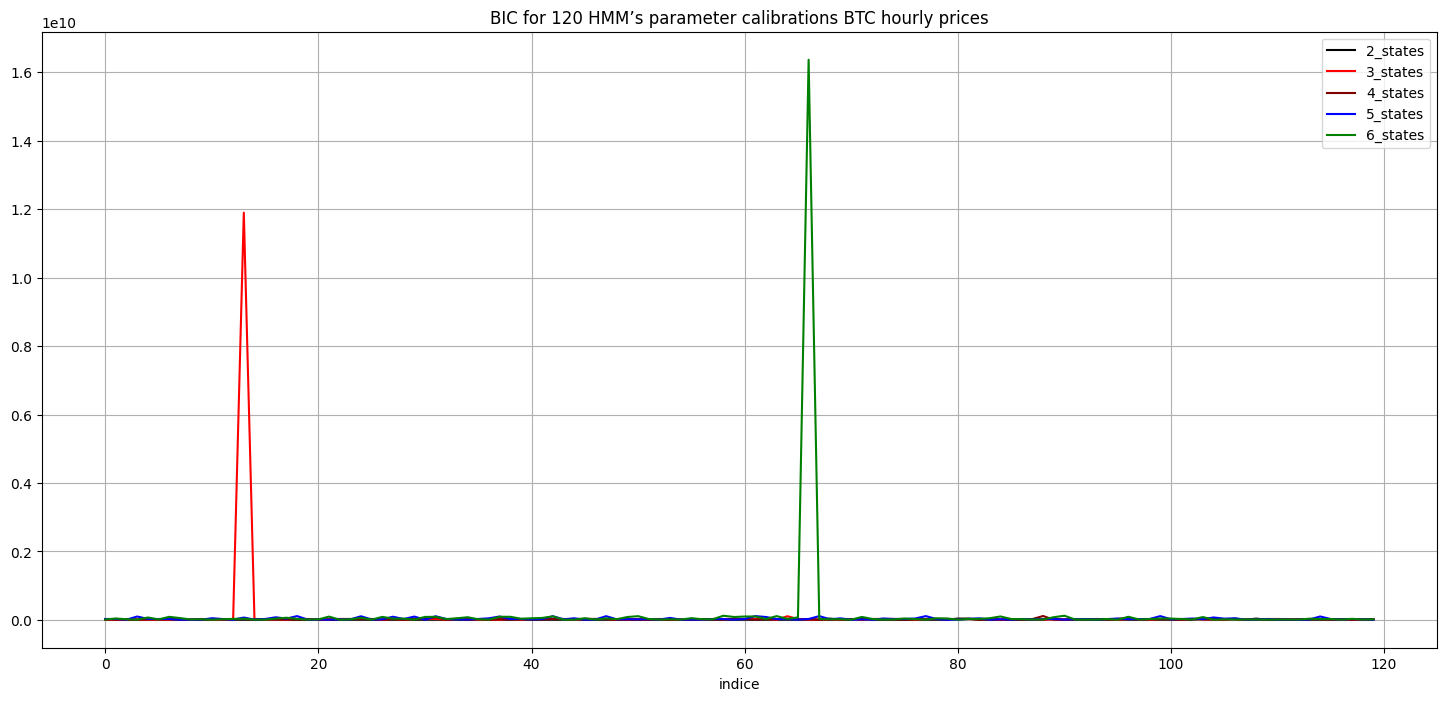

In [29]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_bic['2_states'].plot(color='black',grid = True)
result_bic['3_states'].plot(color='red',grid = True)
result_bic['4_states'].plot(color='maroon',grid = True)
result_bic['5_states'].plot(color='blue',grid = True)
result_bic['6_states'].plot(color='green',grid = True)
plt.title('BIC for 120 HMM’s parameter calibrations BTC hourly prices')
plt.xlabel('indice')
plt.legend()
plt.show()

### AIC

In [30]:
#AIC criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

aic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula '𝑁^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        #likelihood_vect = np.vstack((likelihood_vect, model.score(data_selection)))
#  Computing the BIC as the criteria for model selection
        aic_vect = np.vstack((aic_vect, -2 * model.score( dataset) +  2 * num_params)) 
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(aic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


Model is not converging.  Current: -22564.404838242237 is not greater than -22561.882419595724. Delta is -2.5224186465129605


The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
 number of states  5
The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53


Model is not converging.  Current: -22058.42387919028 is not greater than -22058.343213562617. Delta is -0.08066562766180141


The i 54
The i 55
The i 56


Model is not converging.  Current: -21946.847236031113 is not greater than -21946.845393228825. Delta is -0.001842802288592793


The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
 number of states  6


In [31]:
result = np.transpose(aic_vect)
result_aic = result.reshape(5,120)
result_aic = {'2_states':result_aic[0,:],
        '3_states':result_aic[1,:],
        '4_states':result_aic[2,:],
        '5_states':result_aic[3,:],
        '6_states':result_aic[4,:]}
result_aic = pd.DataFrame(result_aic)

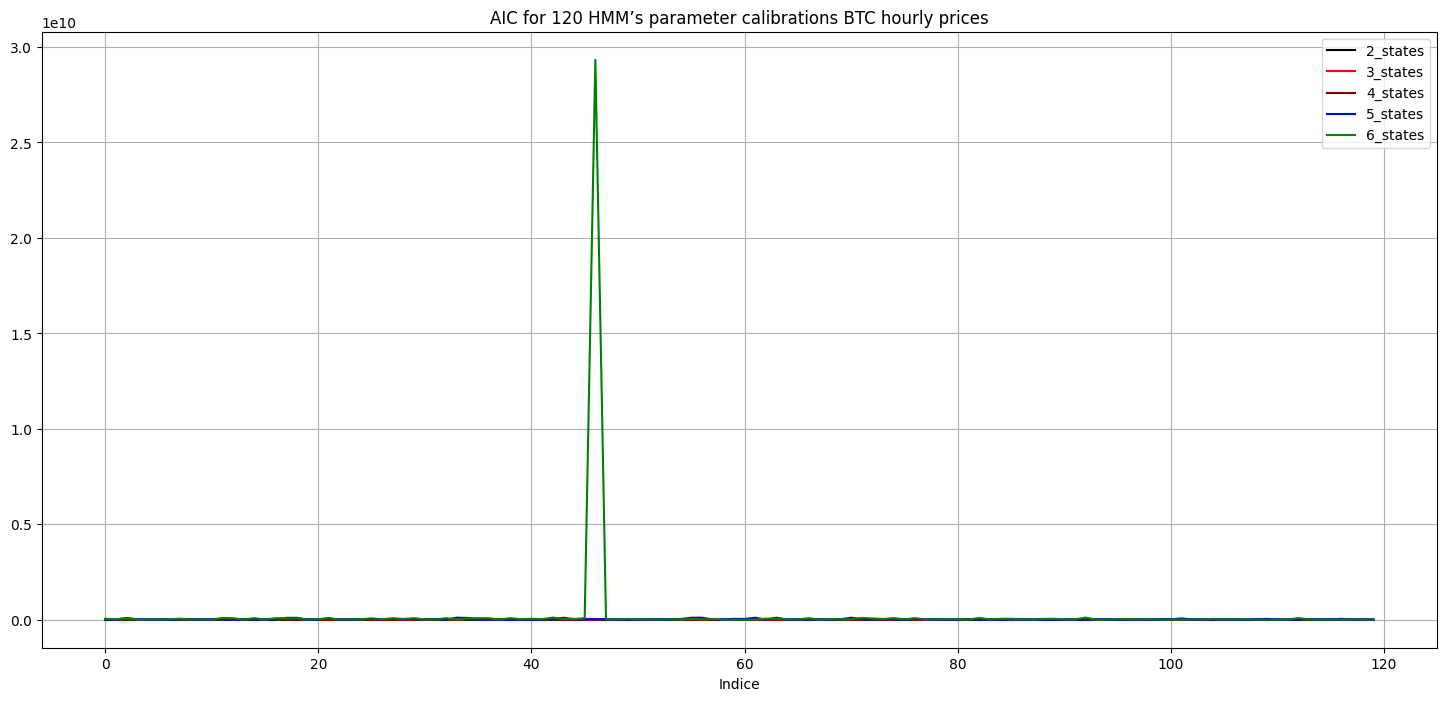

In [32]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_aic['2_states'].plot(color='black',grid = True)
result_aic['3_states'].plot(color='red',grid = True)
result_aic['4_states'].plot(color='maroon',grid = True)
result_aic['5_states'].plot(color='blue',grid = True)
result_aic['6_states'].plot(color='green',grid = True)
plt.title('AIC for 120 HMM’s parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

### HQC

In [33]:
#hqc criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

#predicted_stock_data = np.empty([0,dataset.shape[1]])
#likelihood_vect = np.empty([0,1])
hqc_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula '𝑁^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        hqc_vect = np.vstack((hqc_vect, -2 * model.score( dataset) + np.log(np.log(dataset.shape[0])) * num_params))
       # likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
#  Computing the BIC as the criteria for model selection
       #aic_vect = np.vstack((aic_vect, -2 * model.score( dataset) +  2 * num_params)) 
        #hqc_vect = np.vstack(hqc_vect, -2 * model.score(dataset) +  num_params * (np.log(np.log(dataset.shape[0]))))
    #selection_array[i-1,:] = np.transpose(bic_vect)
   # print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2
#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


Model is not converging.  Current: -22732.933998617413 is not greater than -22732.93312832263. Delta is -0.0008702947816345841


The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82


In [34]:
result_h = np.transpose(hqc_vect)
result_hqc = result_h.reshape(5,120)
result_hqc = {'2_states':result_hqc[0,:],
        '3_states':result_hqc[1,:],
        '4_states':result_hqc[2,:],
        '5_states':result_hqc[3,:],
        '6_states':result_hqc[4,:]}
result_hqc = pd.DataFrame(result_hqc)

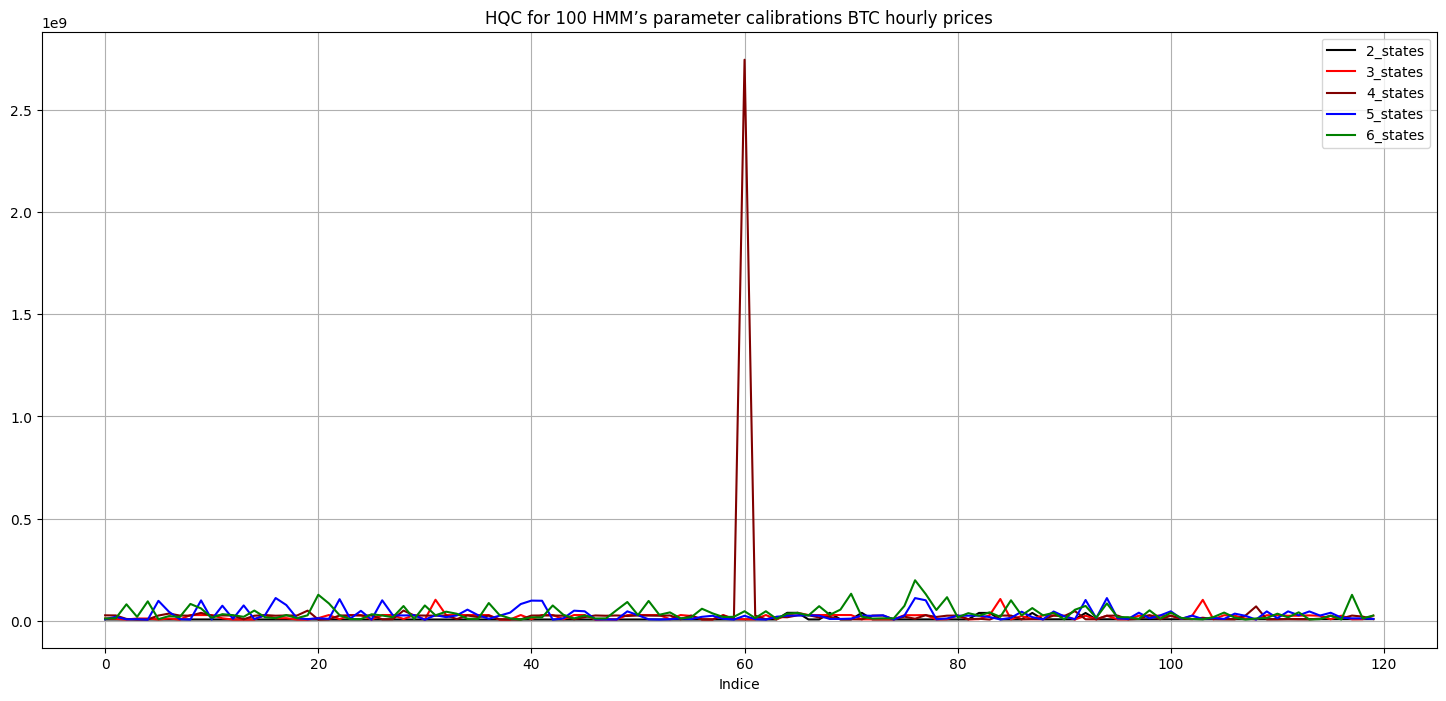

In [35]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_hqc['2_states'].plot(color='black',grid = True)
result_hqc['3_states'].plot(color='red',grid = True)
result_hqc['4_states'].plot(color='maroon',grid = True)
result_hqc['5_states'].plot(color='blue',grid = True)
result_hqc['6_states'].plot(color='green',grid = True)
plt.title('HQC for 100 HMM’s parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

### CAIC

In [36]:
#caic criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

#predicted_stock_data = np.empty([0,dataset.shape[1]])
#likelihood_vect = np.empty([0,1])
caic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula '𝑁^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        #likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
        #  Computing the BIC as the criteria for model selection
        caic_vect = np.vstack((caic_vect, -2 * model.score(dataset) + (np.log(dataset.shape[0]) + 1) * num_params)) 
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


Model is not converging.  Current: -21792.618836083926 is not greater than -21792.50667435646. Delta is -0.11216172746571829


The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113


Model is not converging.  Current: -22365.578593023703 is not greater than -22365.57843827019. Delta is -0.00015475351392524317


The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
 number of states  5
The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9


Model is not converging.  Current: -21934.658683327103 is not greater than -21933.406226956788. Delta is -1.2524563703154854


The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26


Model is not converging.  Current: -21524.001787430596 is not greater than -21523.65789950346. Delta is -0.3438879271343467


The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105


Model is not converging.  Current: -21805.451418625533 is not greater than -21805.442763858427. Delta is -0.008654767105326755


The i 106
The i 107
The i 108
The i 109
The i 110
The i 111
The i 112
The i 113
The i 114
The i 115
The i 116
The i 117
The i 118
The i 119
 number of states  6


In [37]:
result_c = np.transpose(caic_vect)
result_caic = result_c.reshape(5,120)
result_caic = {'2_states':result_caic[0,:],
        '3_states':result_caic[1,:],
        '4_states':result_caic[2,:],
        '5_states':result_caic[3,:],
        '6_states':result_caic[4,:]}
result_caic = pd.DataFrame(result_caic)

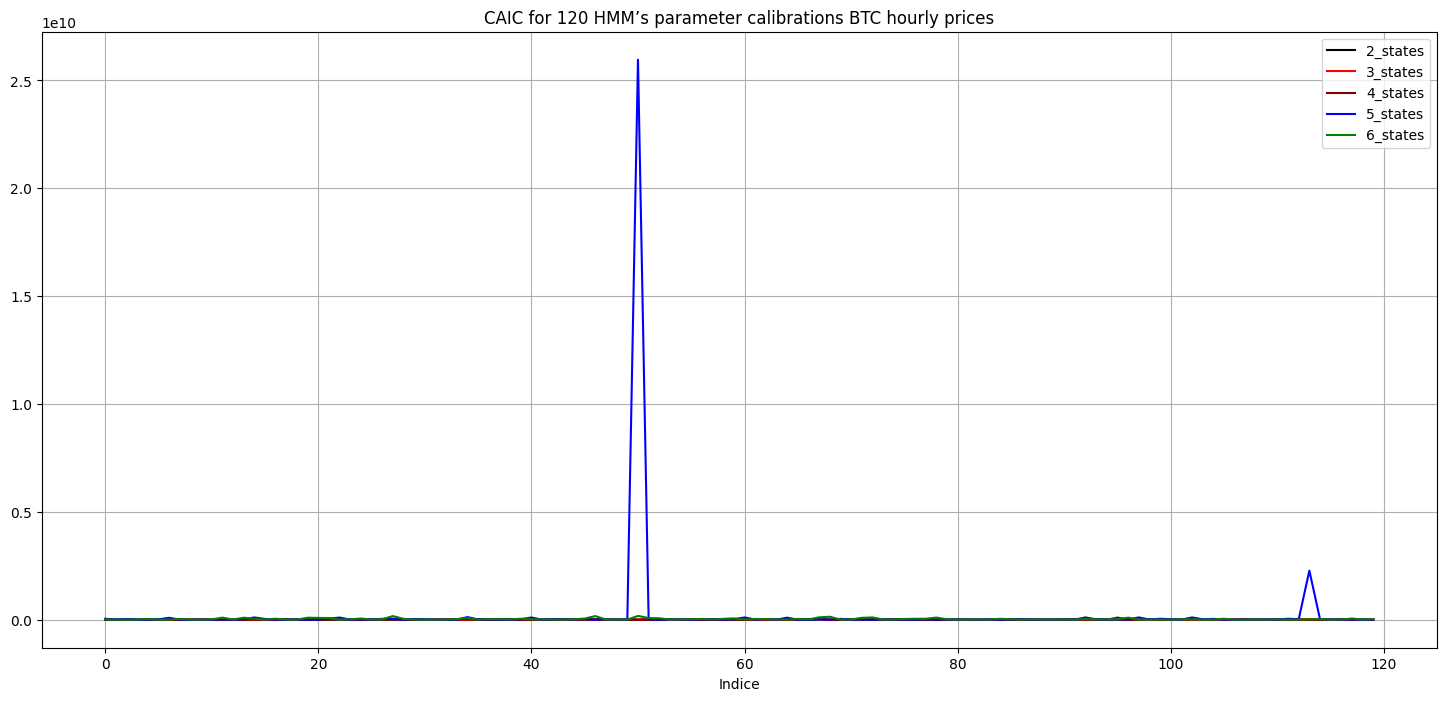

In [38]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_caic['2_states'].plot(color='black',grid = True)
result_caic['3_states'].plot(color='red',grid = True)
result_caic['4_states'].plot(color='maroon',grid = True)
result_caic['5_states'].plot(color='blue',grid = True)
result_caic['6_states'].plot(color='green',grid = True)
plt.title('CAIC for 120 HMM’s parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [39]:
# Merge them into one DataFrame for comparison
result_combined = pd.concat([result_aic, result_bic, result_hqc, result_caic], axis=1)
result_combined.columns = [
    '2_states_AIC', '3_states_AIC', '4_states_AIC', '5_states_AIC', '6_states_AIC',
    '2_states_BIC', '3_states_BIC', '4_states_BIC', '5_states_BIC', '6_states_BIC',
    '2_states_HQC', '3_states_HQC', '4_states_HQC', '5_states_HQC', '6_states_HQC',
    '2_states_CAIC', '3_states_CAIC', '4_states_CAIC', '5_states_CAIC', '6_states_CAIC'
]

# Show the combined table to compare all criteria
print(result_combined)

# Now, let's find the optimal number of states based on each criterion (AIC, BIC, HQC, and CAIC)

# To find the best number of states for each criterion, we can find the index of the minimum value for each column
best_states = {}
for criterion in ['AIC', 'BIC', 'HQC', 'CAIC']:
    # Find the best number of states for each criterion by checking which row has the minimum value
    best_states[criterion] = {}
    for i in range(2, 7):  # For 2 states to 6 states
        best_states[criterion][f'{i}_states'] = result_combined[f'{i}_states_{criterion}'].idxmin()

# Convert best_states dictionary to a DataFrame
best_states_df = pd.DataFrame(best_states)

# Display the table
print(best_states_df)

     2_states_AIC  3_states_AIC  4_states_AIC  5_states_AIC  6_states_AIC  \
0    7.488878e+06  1.184727e+07  8.354299e+06  1.138555e+07  5.360871e+07   
1    7.450571e+06  2.940043e+07  2.696962e+07  1.027153e+07  3.493728e+07   
2    7.441212e+06  2.914622e+07  8.409615e+06  1.000342e+08  8.140372e+07   
3    7.448941e+06  8.814704e+06  8.680689e+06  2.737298e+07  9.399630e+06   
4    7.425313e+06  7.101115e+06  8.023167e+06  7.944850e+06  9.517352e+06   
..            ...           ...           ...           ...           ...   
115  8.788601e+06  2.553962e+07  1.681469e+07  1.234333e+07  1.893017e+07   
116  8.821479e+06  8.296580e+06  2.636260e+07  5.699561e+07  1.253712e+07   
117  8.862063e+06  2.593940e+07  1.228757e+07  6.902555e+06  1.396143e+07   
118  8.899837e+06  8.546211e+06  2.636930e+07  1.198585e+07  1.281194e+07   
119  8.943908e+06  8.045135e+06  9.135479e+06  1.266499e+07  2.142350e+07   

     2_states_BIC  3_states_BIC  4_states_BIC  5_states_BIC  6_states_BIC  

## Best model training

The idx 789
The idx 788
The idx 787
The idx 786
The idx 785
The idx 784
The idx 783
The idx 782
The idx 781
The idx 780
The idx 779
The idx 778
The idx 777
The idx 776
The idx 775
The idx 774
The idx 773
The idx 772
The idx 771
The idx 770
The idx 769
The idx 768
The idx 767
The idx 766
The idx 765
The idx 764
The idx 763
The idx 762
The idx 761
The idx 760
The idx 759
The idx 758
The idx 757
The idx 756
The idx 755
The idx 754
The idx 753
The idx 752
The idx 751
The idx 750
The idx 749
The idx 748
The idx 747
The idx 746
The idx 745
The idx 744
The idx 743
The idx 742
The idx 741
The idx 740
The idx 739
The idx 738
The idx 737
The idx 736
The idx 735
The idx 734
The idx 733
The idx 732
The idx 731
The idx 730
The idx 729
The idx 728
The idx 727
The idx 726
The idx 725
The idx 724
The idx 723
The idx 722
The idx 721
The idx 720
The idx 719
The idx 718
The idx 717
The idx 716
The idx 715
The idx 714
The idx 713
The idx 712
The idx 711
The idx 710
The idx 709
The idx 708
The idx 707
The 

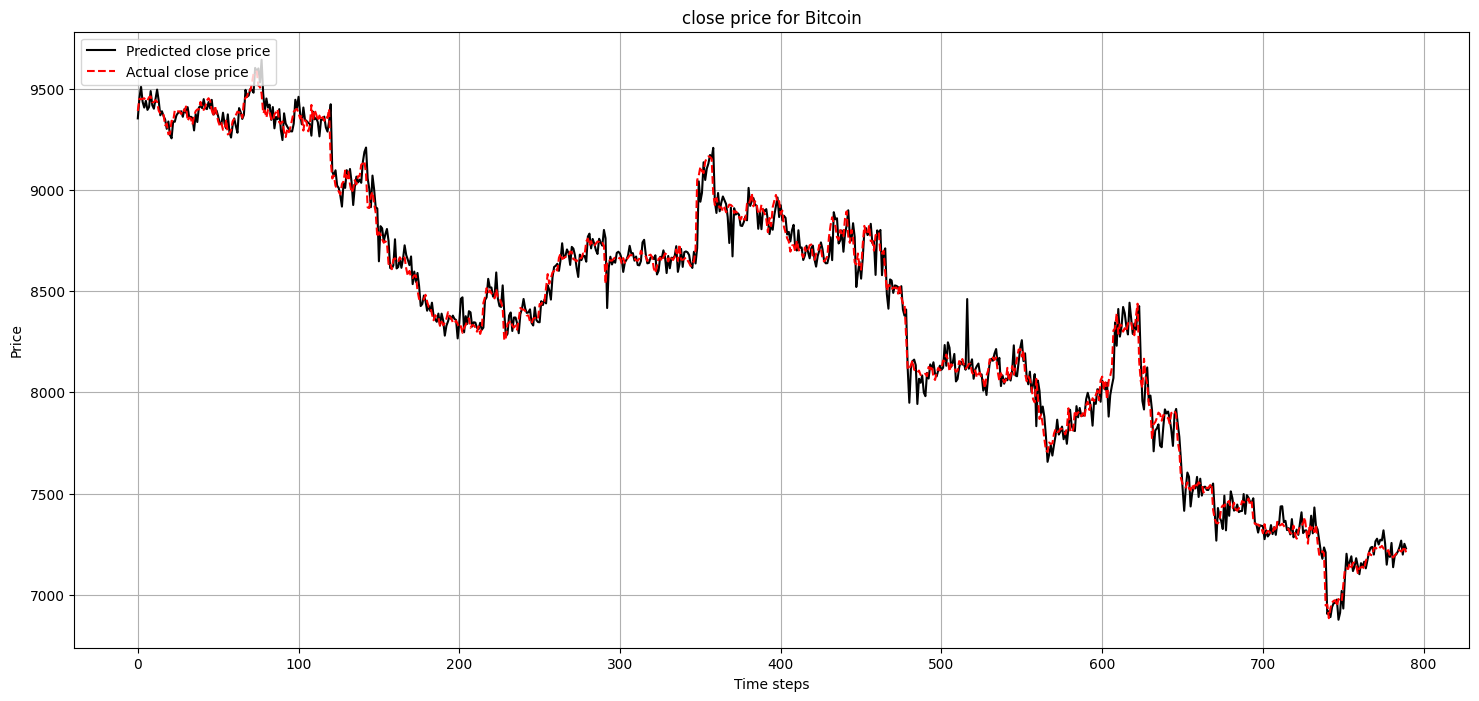

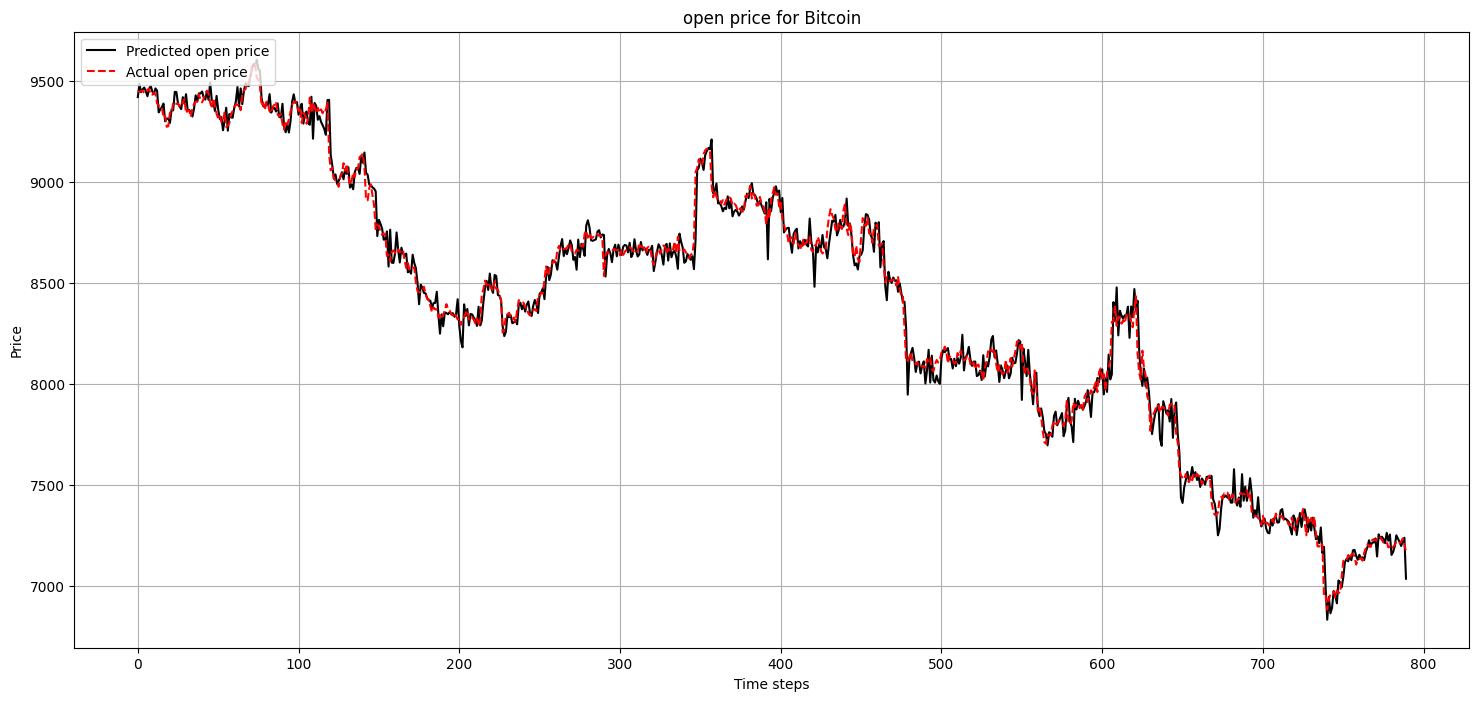

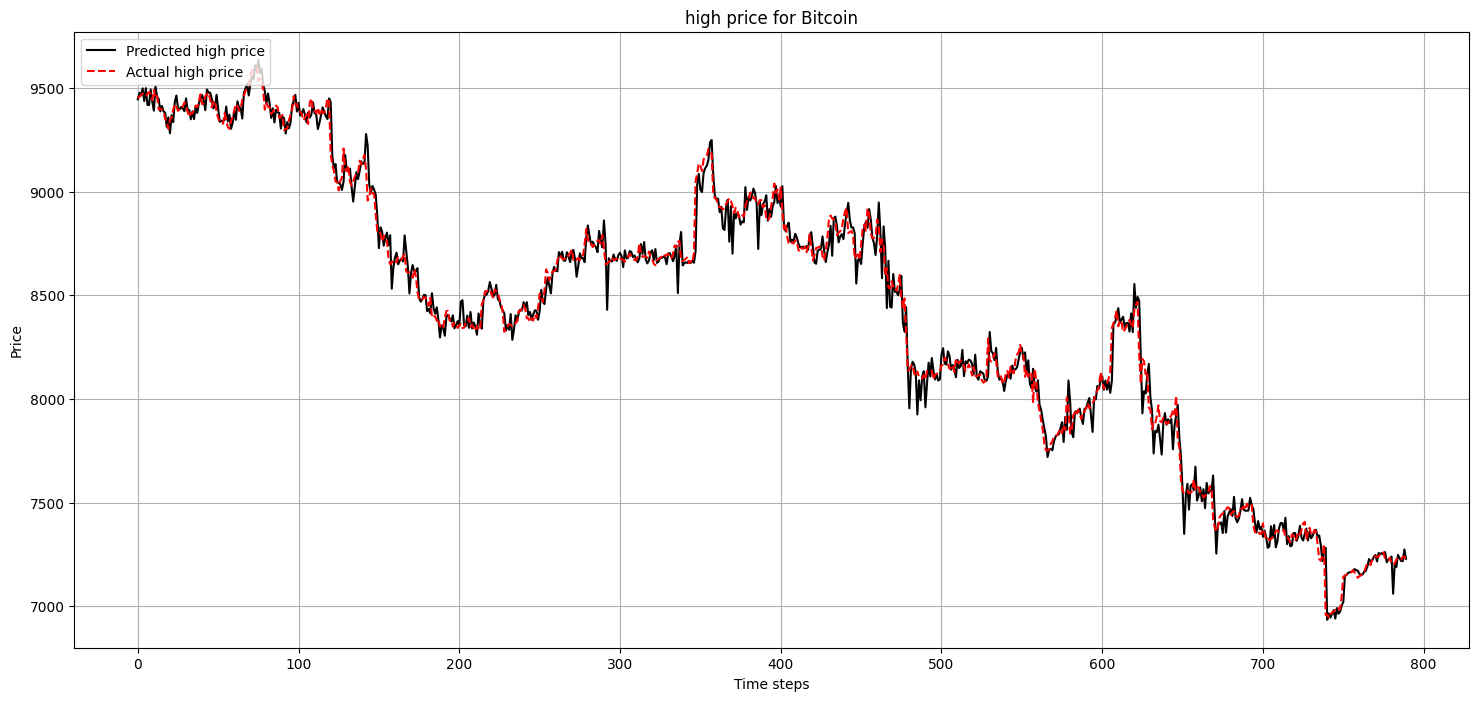

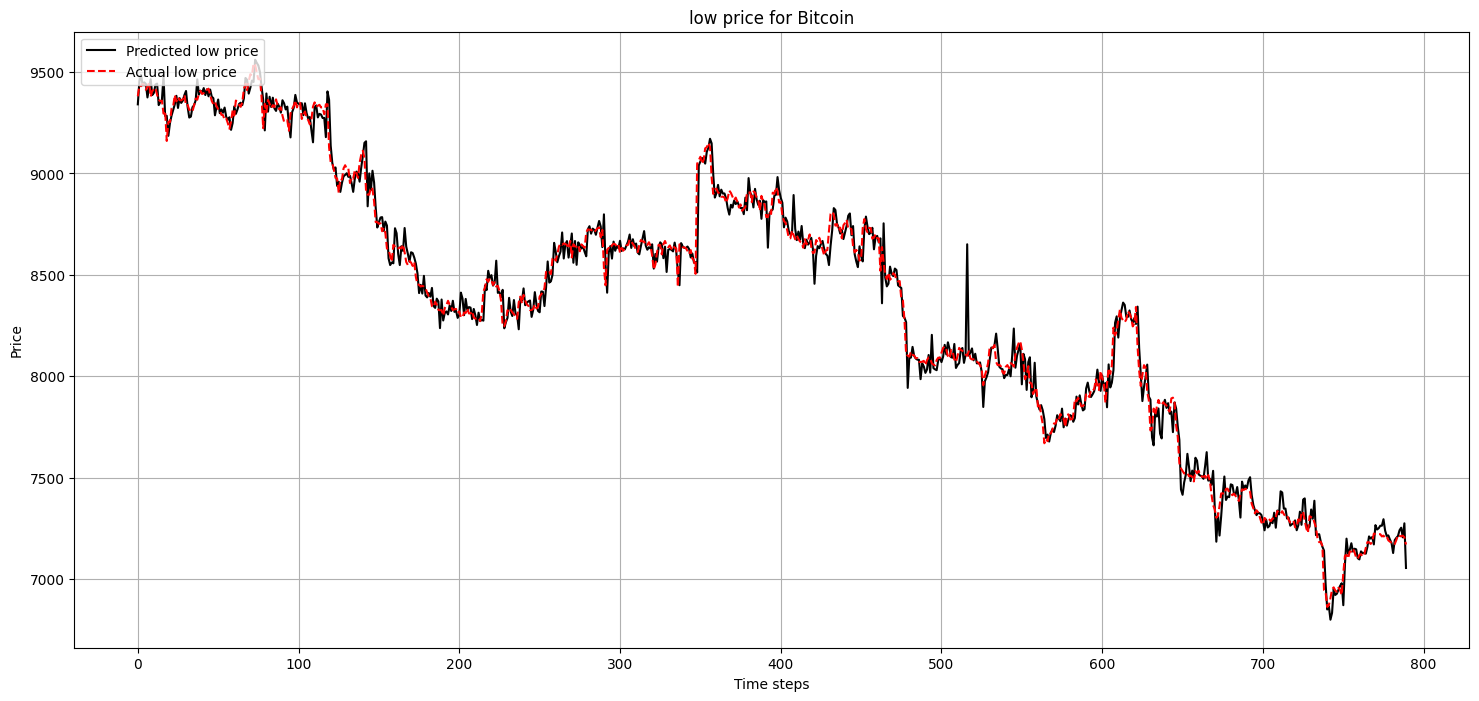

In [40]:
opt_states = 4 # Optimal state
mape_computed=[]
mae_computed=[]
me_computed=[]
mpe_computed=[]
rmse_computed=[]
for idx in reversed(range(NUM_TEST)):
    print('The idx {}'.format(idx))
    train_dataset = dataset[idx + 1:,:]
    test_data = dataset[idx,:]
    num_examples = train_dataset.shape[0]

    #model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', startprob_prior=dirichlet_params, transmat_prior=dirichlet_params, tol=0.0001, n_iter=NUM_ITERS, init_params='mc')


    if idx == NUM_TEST - 1:
        # build a HMM instance with a initial parameters
        model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='stmc')
    else:

    # Retuning the model by using the HMM paramters from the previous iterations as the prior
        # build a HMM instance
        model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='')
        model.transmat_ = transmat_retune_prior  # initial transition matrix
        model.startprob_ = startprob_retune_prior # initial destrebution prbability
        model.means_ = means_retune_prior  # initial nean value
        model.covars_ = covars_retune_prior # initial covars matrix
    #Training HMM parameters 
    model.fit(np.flipud(train_dataset))

#  transmat_ (array, shape (n_components, n_components)) – Matrix of transition probabilities between states.
   
    transmat_retune_prior = model.transmat_   # save the model transmat for next iteration

#  startprob_ (array, shape (n_components, )) – Initial state occupation distribution.
    
    startprob_retune_prior = model.startprob_ # save the star probability for next iteration
    means_retune_prior = model.means_ # save the mean value for next iteration
    covars_retune_prior = model.covars_ # save the covars matrix for next iteration

    if model.monitor_.iter == NUM_ITERS: # check the sufficient number of iterations
        print('Increase number of iterations')
        sys.exit(1)

    iters = 1 # start iteration
    past_likelihood = [] # create a list for past likelihood values

    curr_likelihood = model.score(np.flipud(train_dataset[0:K - 1, :])) #calculate the current likelihood value of initial data window

    while iters < num_examples / K - 1:# calculate the likelihood for all data window
        past_likelihood = np.append(past_likelihood, model.score(np.flipud(train_dataset[iters:iters + K - 1, :])))
        iters = iters + 1 # next iteration
    likelihood_diff_idx = np.argmin(np.absolute(past_likelihood - curr_likelihood)) # loking for teh argument of past likelihood instate of the current likelihood
     # formula for the estimation value(article, page 7, formula (6))
    predicted_change = train_dataset[likelihood_diff_idx,:] - train_dataset[likelihood_diff_idx + 1,:]
    predicted_stock_data = np.vstack((predicted_stock_data, dataset[idx + 1,:] + predicted_change))

mape = calc_mape(predicted_stock_data, np.flipud(dataset[range(790),:]))
mape_computed.append(mape)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mape))

mae = calc_mape(predicted_stock_data, np.flipud(dataset[range(790),:]))
mae_computed.append(mae)
print('MAE for close, open, high and Low bitcoin prices are as follows : {} '.format(mae))

me = calc_me(predicted_stock_data, np.flipud(dataset[range(790),:]))
me_computed.append(me)
print('ME for close, open, high and Low bitcoin prices are as follows : {} '.format(me))

mpe = calc_mpe(predicted_stock_data, np.flipud(dataset[range(790),:]))
mpe_computed.append(mpe)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mpe))

rmse = calc_rmse(predicted_stock_data, np.flipud(dataset[range(790),:]))
rmse_computed.append(rmse)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(rmse))


if PLOT_TYPE:
    hdl_p = plt.plot(range(790), predicted_stock_data);
    plt.title('Predicted bitcoin prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
    plt.figure()
    hdl_a = plt.plot(range(790),np.flipud(dataset[range(790),:]))
    plt.title('Actual bitcoin prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
else:
    for i in range(4):
        plt.figure()
        plt.plot(range(790), predicted_stock_data[:,i],'k-', label = 'Predicted '+labels[i]+' price');
        plt.plot(range(790),np.flipud(dataset[range(790),i]),'r--', label = 'Actual '+labels[i]+' price')
        plt.xlabel('Time steps')
        plt.ylabel('Price')
        plt.title(labels[i]+' price'+ ' for '+"Bitcoin")
        plt.grid(True)
        plt.legend(loc = 'upper left')        
if PLOT_SHOW:
    plt.show(block=False)

In [41]:
mae_computed=[]
me_computed=[]
mpe_computed=[]
rmse_computed=[]
mae = calc_mae(predicted_stock_data, np.flipud(dataset[range(NUM_TEST),:]))
mae_computed.append(mae)
print('MAE for close, open, high and Low bitcoin prices are as follows : {} '.format(mae))
me = calc_me(predicted_stock_data, np.flipud(dataset[range(NUM_TEST),:]))
me_computed.append(me)
print('ME for close, open, high and Low bitcoin prices are as follows : {} '.format(me))
mpe = calc_mpe(predicted_stock_data, np.flipud(dataset[range(NUM_TEST),:]))
mpe_computed.append(mpe)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mpe))
rmse = calc_rmse(predicted_stock_data, np.flipud(dataset[range(NUM_TEST),:]))
rmse_computed.append(rmse)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(rmse))

MAE for close, open, high and Low bitcoin prices are as follows : [46.76656962 43.28018987 44.54463291 45.77507595] 
ME for close, open, high and Low bitcoin prices are as follows : [ 0.28178481 -2.14548101 -2.84392405  1.21867089] 
MAPE for close, open, high and Low bitcoin prices are as follows : [ 6.37863670e-05 -2.59245795e-04 -3.16840559e-04  1.76118852e-04] 
MAPE for close, open, high and Low bitcoin prices are as follows : [0.25380589 0.22506137 0.24902647 0.27175086] 


## Model Class

In [27]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product

class HMMBacktestEvaluator:
    def __init__(self, n_states=4, n_iter=100, K=10, cov_type='full', tol=1e-4):
        self.n_states = n_states
        self.n_iter = n_iter
        self.K = K
        self.cov_type = cov_type
        self.tol = tol
        self.metrics = {}

    def fit_predict(self, dataset, num_test=10):
        predicted_stock_data = []

        for idx in reversed(range(num_test)):
            train_dataset = dataset[idx + 1:, :]
            test_data = dataset[idx, :]
            num_examples = train_dataset.shape[0]

            if idx == num_test - 1:
                model = hmm.GaussianHMM(n_components=self.n_states, covariance_type=self.cov_type,
                                        tol=self.tol, n_iter=self.n_iter, init_params='stmc')
            else:
                model = hmm.GaussianHMM(n_components=self.n_states, covariance_type=self.cov_type,
                                        tol=self.tol, n_iter=self.n_iter, init_params='')
                model.transmat_ = self.transmat_
                model.startprob_ = self.startprob_
                model.means_ = self.means_
                model.covars_ = self.covars_

            model.fit(np.flipud(train_dataset))

            # Save model params
            self.transmat_ = model.transmat_
            self.startprob_ = model.startprob_
            self.means_ = model.means_
            self.covars_ = model.covars_

            if model.monitor_.iter == self.n_iter:
                print("Warning: Max iterations reached. Consider increasing `n_iter`.")

            curr_likelihood = model.score(np.flipud(train_dataset[0:self.K - 1, :]))
            past_likelihood = []

            for i in range(1, int(num_examples / self.K)):
                window = train_dataset[i:i + self.K - 1, :]
                if window.shape[0] < self.K - 1:
                    continue
                score = model.score(np.flipud(window))
                past_likelihood.append(score)

            likelihood_diff_idx = np.argmin(np.abs(np.array(past_likelihood) - curr_likelihood))
            predicted_change = train_dataset[likelihood_diff_idx, :] - train_dataset[likelihood_diff_idx + 1, :]
            predicted_row = dataset[idx + 1, :] + predicted_change
            predicted_stock_data.append(predicted_row)

        self.predicted = np.array(predicted_stock_data)
        self.actual = np.flipud(dataset[:num_test, :])
        return self.predicted

    def evaluate(self):
        actual = self.actual
        predicted = self.predicted

        self.metrics['MAPE'] = np.mean(np.abs((actual - predicted) / actual)) * 100
        self.metrics['MAE'] = mean_absolute_error(actual, predicted)
        self.metrics['ME'] = np.mean(actual - predicted)
        self.metrics['MPE'] = np.mean((actual - predicted) / actual) * 100
        self.metrics['RMSE'] = np.sqrt(mean_squared_error(actual, predicted))

        return self.metrics

    def plot_predictions(self, labels=None, show=True):
        if labels is None:
            labels = ['Feature ' + str(i) for i in range(self.predicted.shape[1])]

        for i in range(self.predicted.shape[1]):
            plt.figure()
            plt.plot(range(len(self.predicted)), self.predicted[:, i], 'k-', label='Predicted ' + labels[i])
            plt.plot(range(len(self.actual)), self.actual[:, i], 'r--', label='Actual ' + labels[i])
            plt.title(f'{labels[i]} Price Prediction')
            plt.xlabel('Time Step')
            plt.ylabel('Value')
            plt.grid(True)
            plt.legend(loc='upper left')

        if show:
            plt.show(block=False)

    def tune_hyperparameters(self, dataset, num_test=10,
                              cov_types=['full', 'diag'],
                              n_iters=[100, 200, 300],
                              K_values=[5, 10, 15],
                              tols=[1e-2, 1e-3, 1e-4]):

        best_config = None
        best_mape = float('inf')

        for cov_type, n_iter, K, tol in product(cov_types, n_iters, K_values, tols):
            print(f"Testing: cov_type={cov_type}, n_iter={n_iter}, K={K}, tol={tol}")
            try:
                evaluator = HMMBacktestEvaluator(n_states=self.n_states, n_iter=n_iter,
                                                 K=K, cov_type=cov_type, tol=tol)
                evaluator.fit_predict(dataset, num_test=num_test)
                metrics = evaluator.evaluate()
                current_mape = metrics['MAPE']
                print(f"  MAPE: {current_mape:.4f}")

                if current_mape < best_mape:
                    best_mape = current_mape
                    best_config = {
                        'cov_type': cov_type,
                        'n_iter': n_iter,
                        'K': K,
                        'tol': tol,
                        'metrics': metrics
                    }

            except Exception as e:
                print(f"  Skipped due to error: {e}")
                continue

        print("\nBest Configuration:")
        print(best_config)
        return best_config


Testing: cov_type=full, n_iter=100, K=5, tol=0.01
  MAPE: 0.3167
Testing: cov_type=full, n_iter=100, K=5, tol=0.001
  MAPE: 0.3919
Testing: cov_type=full, n_iter=100, K=5, tol=0.0001
  MAPE: 0.3708
Testing: cov_type=full, n_iter=100, K=10, tol=0.01
  MAPE: 0.4257
Testing: cov_type=full, n_iter=100, K=10, tol=0.001
  MAPE: 0.4530
Testing: cov_type=full, n_iter=100, K=10, tol=0.0001
  MAPE: 0.4163
Testing: cov_type=full, n_iter=100, K=15, tol=0.01
  MAPE: 0.4150
Testing: cov_type=full, n_iter=100, K=15, tol=0.001
  MAPE: 0.4550
Testing: cov_type=full, n_iter=100, K=15, tol=0.0001
  MAPE: 0.4548
Testing: cov_type=full, n_iter=200, K=5, tol=0.01
  MAPE: 0.3543
Testing: cov_type=full, n_iter=200, K=5, tol=0.001
  MAPE: 0.4040
Testing: cov_type=full, n_iter=200, K=5, tol=0.0001
  MAPE: 0.3918
Testing: cov_type=full, n_iter=200, K=10, tol=0.01
  MAPE: 0.3897
Testing: cov_type=full, n_iter=200, K=10, tol=0.001
  MAPE: 0.4329
Testing: cov_type=full, n_iter=200, K=10, tol=0.0001
  MAPE: 0.4376
T

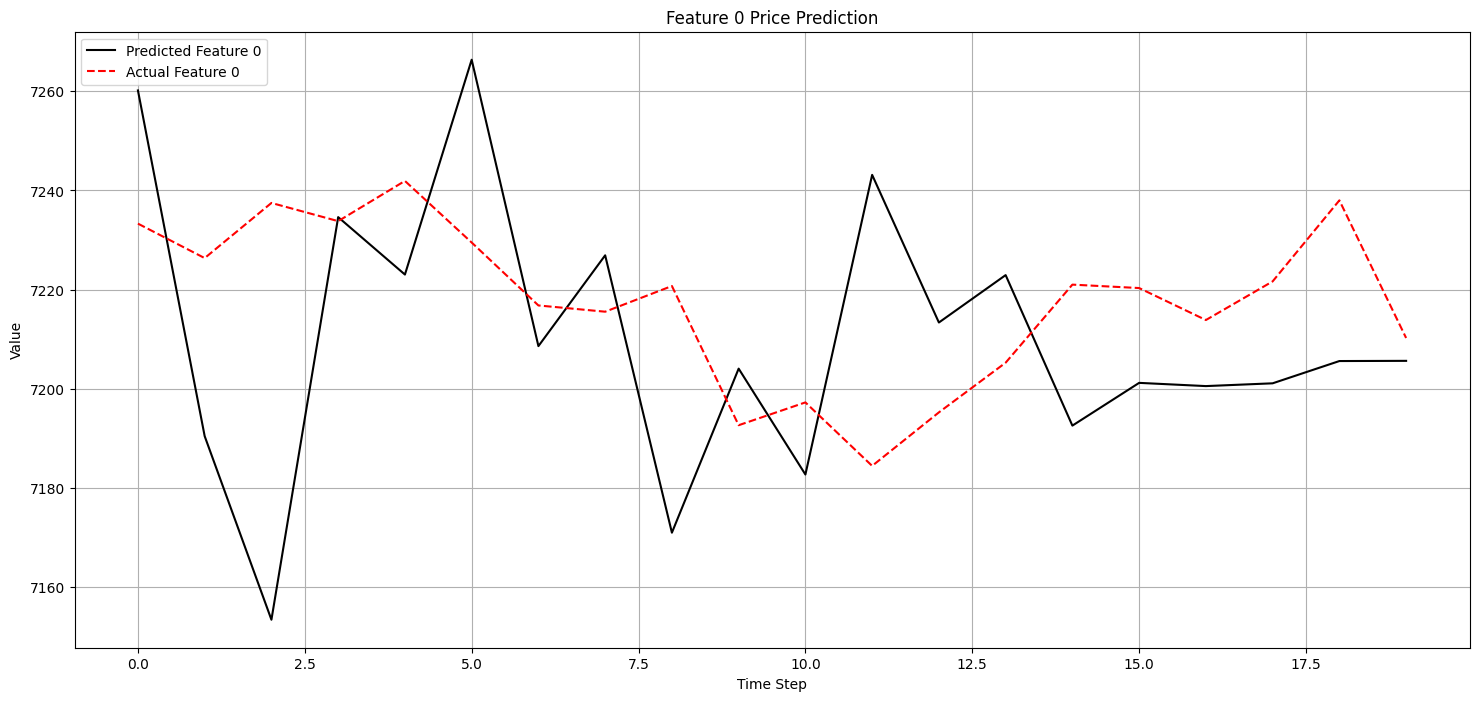

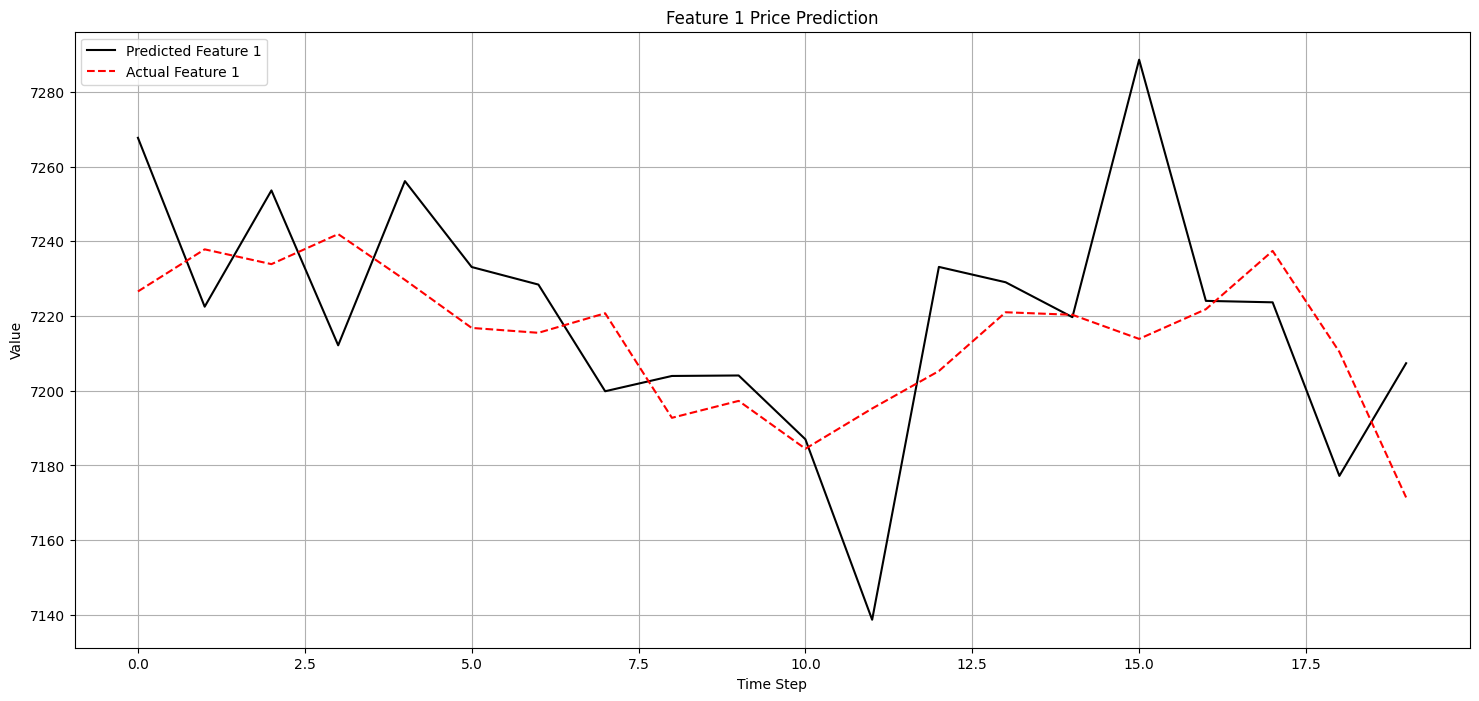

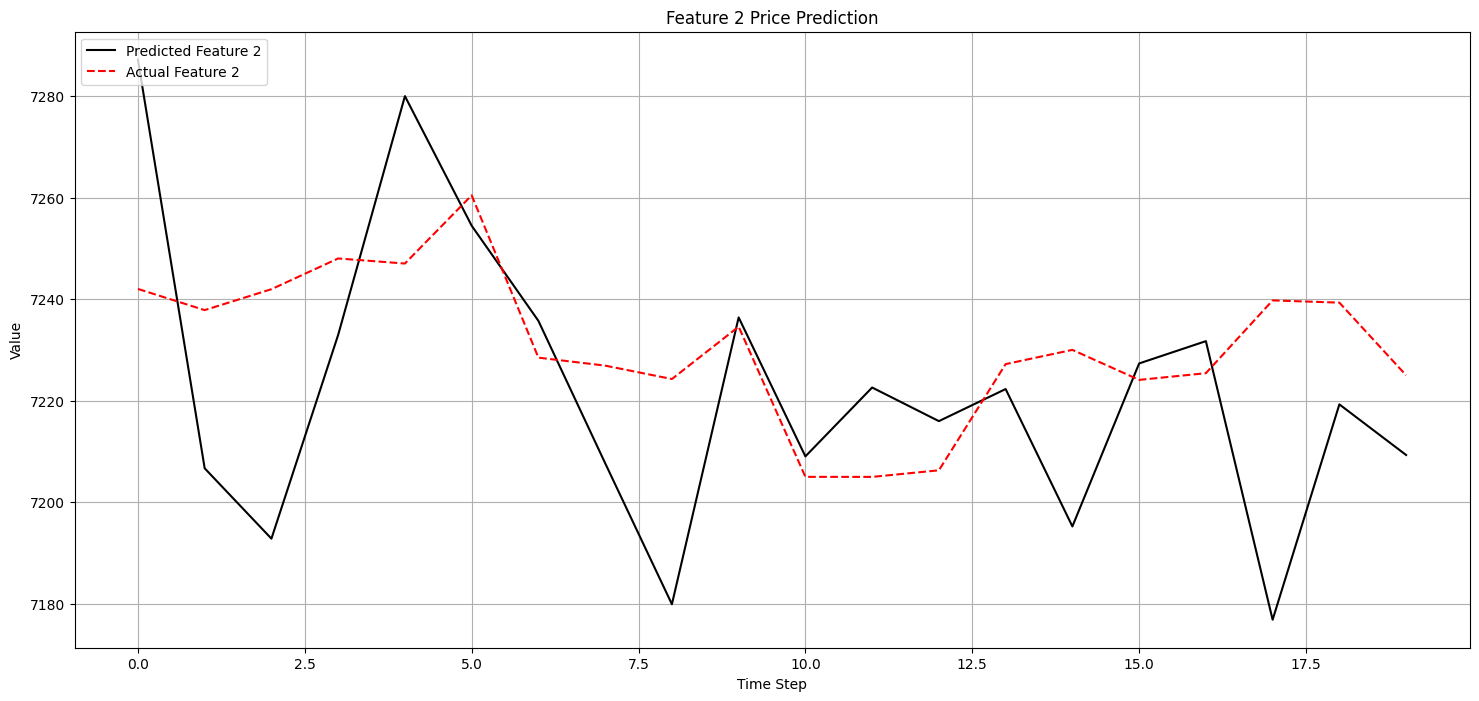

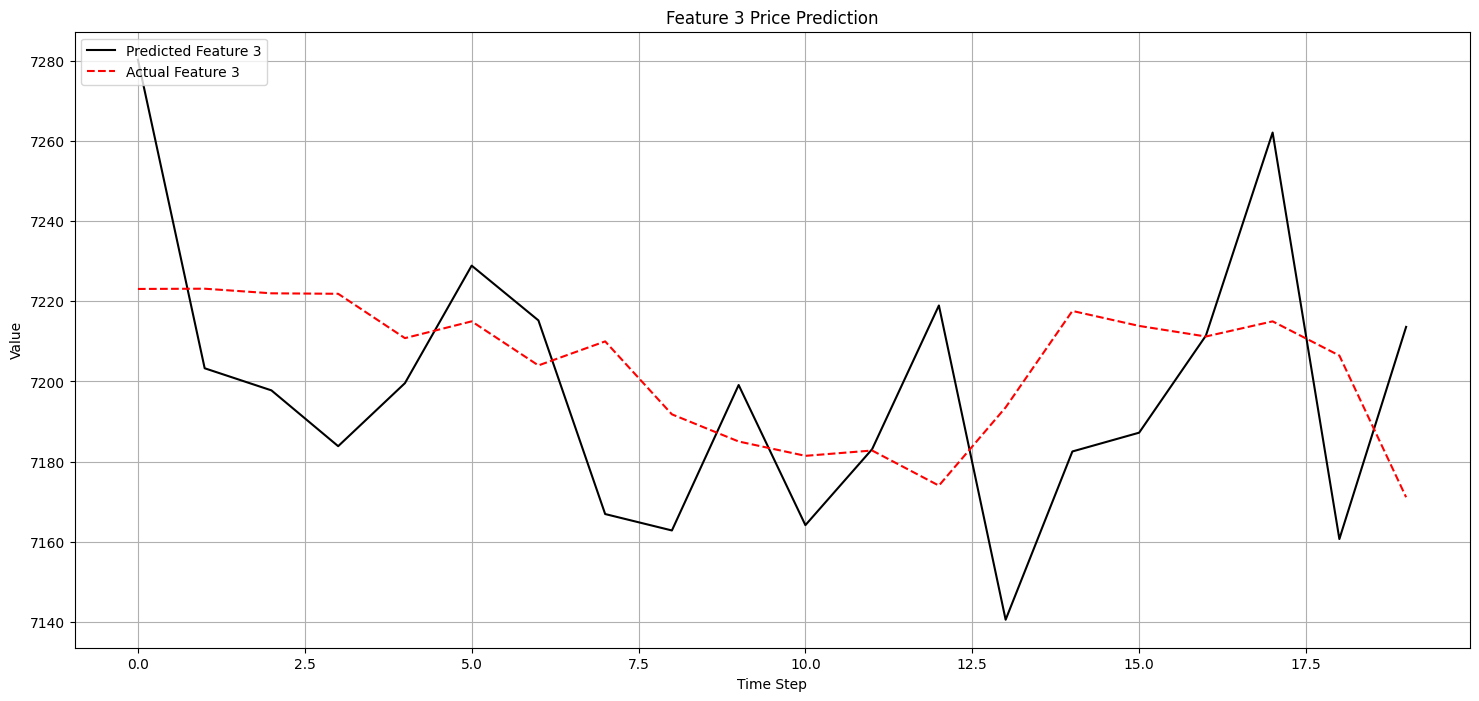

In [28]:
import pandas as pd

# === Parameters ===
CSV_PATH = "./Input/regime_model.csv"  # Replace with your actual file

# Load data (ensure it's preprocessed and numpy format)
df = pd.read_csv(CSV_PATH)

# Tune
evaluator = HMMBacktestEvaluator(n_states=4)
best_config = evaluator.tune_hyperparameters(dataset, num_test=20)

# Best config can now be reused
best_evaluator = HMMBacktestEvaluator(n_states=4,
                                      cov_type=best_config['cov_type'],
                                      n_iter=best_config['n_iter'],
                                      K=best_config['K'],
                                      tol=best_config['tol'])
best_evaluator.fit_predict(dataset, num_test=20)
best_evaluator.plot_predictions()
